In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython import display
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
%matplotlib inline

### LOAD DATA FOR BRISTOL 23-12-2021 ###
df_cal = pd.read_csv('./DATA/bristol-23-12-2021/calendar.csv')
df_list = pd.read_csv('./DATA/bristol-23-12-2021/listings.csv')
df_neigh = pd.read_csv('./DATA/bristol-23-12-2021/neighbourhoods.csv')
df_review = pd.read_csv('./DATA/bristol-23-12-2021/reviews.csv')
# df = pd.read_csv(r"C:\Users\data.csv")

## list columns
print(df_list.columns)
## isolate columns
new_df = df_list[['id','accommodates','neighborhood_overview','neighbourhood','neighbourhood_cleansed','latitude', 'longitude','price']].copy()
##list null count
print(new_df.isnull().sum(axis = 0))
##drop columns
new_df = new_df.drop(['neighborhood_overview', 'neighbourhood'], axis=1)

## price into floats (numerics)
def price2float(new_df):
    new_df['price'] = new_df['price'].str.replace('$', '')
    new_df['price'] = new_df['price'].str.replace(',', '')
    new_df.price = new_df['price'].astype(float)
    return new_df
    
price2float(new_df)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

C:\Users\jonna\AppData\Local\Temp\ipykernel_13500\705638178.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['price'] = new_df['price'].str.replace('$', '')


,id,accommodates,neighbourhood_cleansed,latitude,longitude,price
0,70820,2,Windmill Hill,51.439940,-2.591730,36.0
1,117122,2,Clifton,51.450510,-2.610540,96.0
2,176306,1,Bedminster,51.441010,-2.601210,29.0
3,307634,2,Easton,51.466410,-2.555330,50.0
4,322906,3,Ashley,51.466680,-2.582740,86.0
...,...,...,...,...,...,...
1626,53891008,3,Hillfields,51.471120,-2.523610,36.0
1627,53917549,4,Central,51.461230,-2.593740,94.0
1628,53929226,2,Ashley,51.462980,-2.589600,36.0
1629,53934563,2,Southville,51.444302,-2.592805,114.0


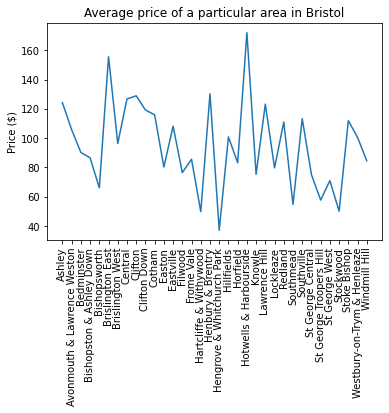

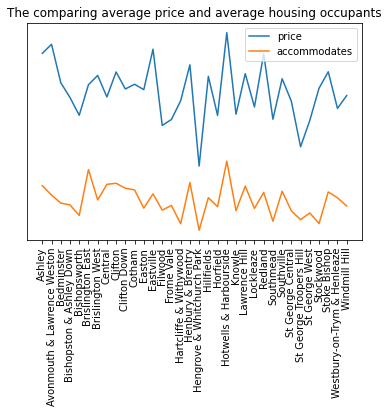

In [293]:
price_means = new_df.groupby('neighbourhood_cleansed').price.mean()
x = price_means.index.tolist()

## a graph to show the average price of a particular area
plt.plot(x,price_means)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')
plt.title('Average price of a particular area in Bristol')
# plt.figure(facecolor=(1, 1, 1))
plt.savefig('plot1.png', bbox_inches='tight')
plt.show()


## see how the data relates to how much housed
houses_nop = new_df.groupby('neighbourhood_cleansed').accommodates.mean().tolist()
##scale the data in order to see a trend
houses_nop = [i * 100 for i in houses_nop]

fig, ax = plt.subplots()
ax.plot(x, houses_nop, label="price")
ax.plot(x, price_means, label="accommodates")

ax.legend()
ax = plt.gca()
#hide y-axis 
ax.get_yaxis().set_visible(False)
ax.title.set_text('The comparing average price and average housing occupants')
plt.xticks(rotation=90)
# plt.figure(facecolor=(1, 1, 1))

plt.savefig('plot2.png', bbox_inches='tight')
plt.show()


neighbourhood_cleansed
Central                   46.977195
Clifton Down              42.176881
Hotwells & Harbourside    39.381958
Lawrence Hill             39.061816
Horfield                  38.320981
Name: pricepp, dtype: float64


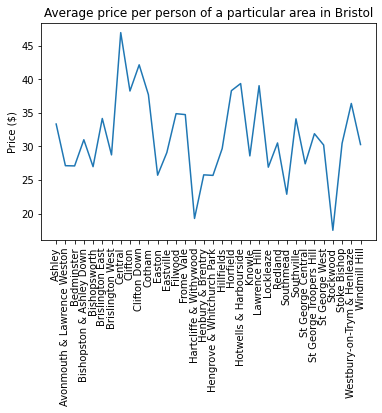

In [294]:
## a graph to show the average price of a particular area
new_df["pricepp"] = new_df["price"] / new_df["accommodates"]
price_means = new_df.groupby('neighbourhood_cleansed').pricepp.mean()
x = price_means.index.tolist()

print(price_means.nlargest(n=5))

plt.plot(x,price_means)
plt.xticks(rotation=90)
plt.ylabel('Price ($)')
plt.title('Average price per person of a particular area in Bristol')
# plt.figure(facecolor=(1, 1, 1))
plt.savefig('plot3.png', bbox_inches='tight')
plt.show()



In [295]:
test = new_df.groupby('neighbourhood_cleansed').price.mean()
print(type(test))
# x
# test.index.tolist()
print(test.nlargest(n=3))
hoods = new_df['neighbourhood_cleansed'].value_counts()
hoodn = hoods.index.tolist()
vals = []

for name, val in hoods.iteritems():
    if name == 'Hotwells & Harbourside': vals.append(val)
    if name == 'Brislington East': vals.append(val)
    if name == 'Henbury & Brentry': vals.append(val)
    
print(vals)
print("frequency of max value: " + np.array2string(hoods.max()))
## comparing frequency of expensive places to max frequency as percentages
print("\nPercentages of max frequency of neighbourhoods...")
for i in vals:
    print((i / hoods.max())*100)

<class 'pandas.core.series.Series'>
neighbourhood_cleansed
Hotwells & Harbourside    172.052632
Brislington East          155.578947
Henbury & Brentry         130.300000
Name: price, dtype: float64
[57, 19, 10]
frequency of max value: 199

Percentages of max frequency of neighbourhoods...
28.643216080402013
9.547738693467336
5.025125628140704


In [296]:
df_brist1 = pd.read_csv('./DATA/bristol-27-09-2021/listings.csv')
df_brist2 = pd.read_csv('./DATA/bristol-25-03-2022/listings.csv')

price2float(df_brist1)
price2float(df_brist2)

print("3 largest average price from original...")
meanti = new_df.groupby('neighbourhood_cleansed').price.mean()
print(meanti.nlargest(n=5))

print("\n3 largest average prices from 27-09-2021...")
meanti = df_brist1.groupby('neighbourhood_cleansed').price.mean()
print(meanti.nlargest(n=5))

print("\n3 largest average prices from 25-03-2022...")
meanti = df_brist2.groupby('neighbourhood_cleansed').price.mean()
print(meanti.nlargest(n=5))

print("\nHotwells and harbourside seems the most expensive place for airbnbs in bristol\n")

3 largest average price from original...
neighbourhood_cleansed
Hotwells & Harbourside    172.052632
Brislington East          155.578947
Henbury & Brentry         130.300000
Clifton                   128.912698
Central                   126.784946
Name: price, dtype: float64

3 largest average prices from 27-09-2021...
neighbourhood_cleansed
Westbury-on-Trym & Henleaze    361.823529
Southville                     208.327869
Hotwells & Harbourside         199.375000
Brislington East               150.789474
Clifton                        131.301587
Name: price, dtype: float64

3 largest average prices from 25-03-2022...
neighbourhood_cleansed
Hotwells & Harbourside         192.788462
Clifton                        147.971631
Avonmouth & Lawrence Weston    147.047619
Brislington East               143.772727
Brislington West               136.030303
Name: price, dtype: float64

Hotwells and harbourside seems the most expensive place for airbnbs in bristol



C:\Users\jonna\AppData\Local\Temp\ipykernel_13500\705638178.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['price'] = new_df['price'].str.replace('$', '')


In [297]:
df_man1 = pd.read_csv('./DATA/manchester-25-09-2021/listings.csv')
df_man2 = pd.read_csv('./DATA/manchester-23-12-2021/listings.csv')
df_man3 = pd.read_csv('./DATA/manchester-24-03-2022/listings.csv')

price2float(df_man1)
price2float(df_man2)
price2float(df_man3)

print("3 largest average price from original...")
meanti = df_man1.groupby('neighbourhood_cleansed').price.mean()
print(meanti.nlargest(n=5))

print("\n3 largest average prices from 27-09-2021...")
meanti = df_man2.groupby('neighbourhood_cleansed').price.mean()
print(meanti.nlargest(n=5))

print("\n3 largest average prices from 25-03-2022...")
meanti = df_man3.groupby('neighbourhood_cleansed').price.mean()
print(meanti.nlargest(n=5))

print("\nArdwick seems the most expensive place for airbnbs in manchester\n")

3 largest average price from original...
neighbourhood_cleansed
Withington             156.464286
Ancoats and Clayton    149.388112
Cheetham               136.240000
City Centre            131.375000
Old Moat               114.260870
Name: price, dtype: float64

3 largest average prices from 27-09-2021...
neighbourhood_cleansed
Ardwick      677.114286
Rusholme     318.428571
Hulme        243.397436
Moss Side    241.164706
Longsight    225.288462
Name: price, dtype: float64

3 largest average prices from 25-03-2022...
neighbourhood_cleansed
Ardwick             674.406250
Gorton South        243.913043
Salford District    188.331738
City Centre         171.996689
Moss Side           153.307692
Name: price, dtype: float64

Ardwick seems the most expensive place for airbnbs in manchester



C:\Users\jonna\AppData\Local\Temp\ipykernel_13500\705638178.py:29: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  new_df['price'] = new_df['price'].str.replace('$', '')


In [298]:
def pricepp(new_df):
    new_df["price pp"] = new_df["price"] / new_df["accommodates"]
    return new_df
pricepp(new_df)
meanti = new_df.groupby('neighbourhood_cleansed')["price pp"].mean()
print(meanti.nlargest(n=5))

# price2float(df_brist1)
# price2float(df_brist2)
pricepp(df_brist1)
meanti = df_brist1.groupby('neighbourhood_cleansed')["price pp"].mean()
print(meanti.nlargest(n=5))

pricepp(df_brist2)
meanti = df_brist2.groupby('neighbourhood_cleansed')["price pp"].mean()
print(meanti.nlargest(n=5))


neighbourhood_cleansed
Central                   46.977195
Clifton Down              42.176881
Hotwells & Harbourside    39.381958
Lawrence Hill             39.061816
Horfield                  38.320981
Name: price pp, dtype: float64
neighbourhood_cleansed
Westbury-on-Trym & Henleaze    175.618137
Hotwells & Harbourside          74.961938
Southville                      71.735064
Central                         43.342344
Clifton                         39.437868
Name: price pp, dtype: float64
neighbourhood_cleansed
Avonmouth & Lawrence Weston    48.750387
Hotwells & Harbourside         44.880230
Clifton                        42.313180
Central                        42.115152
Clifton Down                   40.077359
Name: price pp, dtype: float64


In [299]:
df_man1 = pricepp(df_man1)
meanti = df_man1.groupby('neighbourhood_cleansed').price.mean()
print(meanti.nlargest(n=5))
df_man2 = pricepp(df_man2)
meanti = df_man2.groupby('neighbourhood_cleansed').price.mean()
print(meanti.nlargest(n=5))
pricepp(df_man3)
meanti = df_man3.groupby('neighbourhood_cleansed').price.mean()
print(meanti.nlargest(n=5))

neighbourhood_cleansed
Withington             156.464286
Ancoats and Clayton    149.388112
Cheetham               136.240000
City Centre            131.375000
Old Moat               114.260870
Name: price, dtype: float64
neighbourhood_cleansed
Ardwick      677.114286
Rusholme     318.428571
Hulme        243.397436
Moss Side    241.164706
Longsight    225.288462
Name: price, dtype: float64
neighbourhood_cleansed
Ardwick             674.406250
Gorton South        243.913043
Salford District    188.331738
City Centre         171.996689
Moss Side           153.307692
Name: price, dtype: float64


In [300]:
print((new_df.price.mean() + df_brist2.price.mean() + df_brist1.price.mean()) / 3)

print((df_man1.price.mean() + df_man2.price.mean() + df_man3.price.mean()) / 3)

print("\nAverage price of airbnb's in Manchester is higher than bristol")

113.69454057391441
135.57689515239795

Average price of airbnb's in Manchester is higher than bristol


In [301]:
## building two datasets to predict the next
new_df.price
len(df_brist1.price)
s1 = new_df.price.tolist()
s2 = df_brist1.price.tolist()
merge = s1 + s2

len(merge)
ye = pd.concat([new_df, df_brist1],ignore_index=True)
ye.loc[ye['neighbourhood_cleansed'] == 'Clifton'].price

1        96.0
13      170.0
19       56.0
23       35.0
38       35.0
        ...  
3108     74.0
3116    263.0
3128    197.0
3132     90.0
3133    254.0
Name: price, Length: 252, dtype: float64

In [302]:
lst = df_brist2.groupby('neighbourhood_cleansed').describe().index.tolist()
dic = {k: v for v, k in enumerate(lst)}
dic
# new_df['neighbourhood_cleansed']
ye['neighbourhood_cleansed'] = ye['neighbourhood_cleansed'].map(dic)

In [303]:
y = ye['price']
# y = y.values.reshape(-1, 1)
X = ye['neighbourhood_cleansed']
# X.
print(X)
X = X.values.reshape(-1, 1)
# Create train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

0       33
1        8
2        2
3       11
4        0
        ..
3192     7
3193     5
3194     7
3195    27
3196    22
Name: neighbourhood_cleansed, Length: 3197, dtype: int64
(2237, 1) (2237,)
(960, 1) (960,)


In [304]:
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

The rsquared score on the training data was 0.0003959250905232192.  The rsquared score on the test data was -0.0003134237298751952.


C:\Users\jonna\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
